# Loan Prediction Project

### Problem statement:- Build a classification model to predict if the Loan Status will be approved or not.

Importing the important libraries for data reading and cleaning.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
url=('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')

In [3]:
df=pd.read_csv(url)

In [4]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


We have 614 rows and 13 columns

Lets check the columns we have

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


There are 8 columns which are categorical and 5 numerical.
Our target variable is Loan Status.

In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Quite a few null values are present which we need to handle.

In [7]:
df.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

We will use the mode method to fill the null values in Gender

In [8]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

In [9]:
df.Gender.value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

Done. Lets check the other column.

In [10]:
df.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [11]:
df['Married'].fillna(df['Married'].mode()[0], inplace=True)

In [12]:
df.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [13]:
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)

In [14]:
df.Dependents.value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [15]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

In [16]:
df.Self_Employed.value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

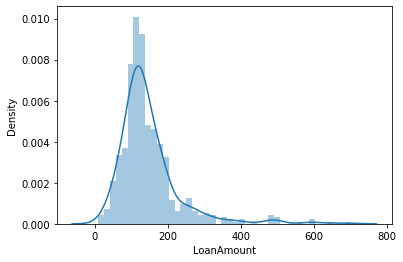

In [17]:
sns.distplot(df['LoanAmount'])

Since the Loan amount is not normally distributed we will use the median method to fill the null values

In [18]:
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)

In [19]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

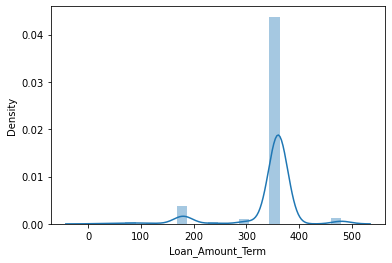

In [20]:
sns.distplot(df['Loan_Amount_Term'])

In [21]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(),inplace=True)

In [22]:
df['Credit_History'].fillna(df['Credit_History'].median(),inplace=True)

We have cleared the null values. Let's move forward with Visualization.

In [23]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


Observation
1. Applicant income ranges between 150 and 81000.
2. Loan amount is between 9 and 700

### Visualization

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

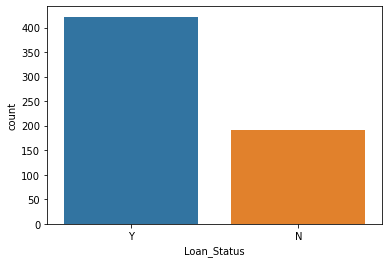

In [24]:
sns.countplot(df.Loan_Status)

We can see that Loan of the maximum applicant has been approved. We can also observe the class imbalance in our target variable.

<AxesSubplot:xlabel='Gender', ylabel='count'>

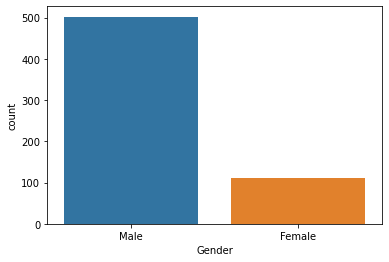

In [25]:
sns.countplot(df.Gender)

Most of the applicant ares Male. There are very few female applicants.

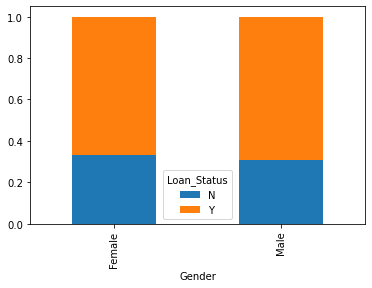

In [26]:
ct = pd.crosstab(df.Gender, df.Loan_Status,normalize='index')
ct.plot.bar(stacked=True)
plt.show()

Male applicant has more chance of getting the loan approval.

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

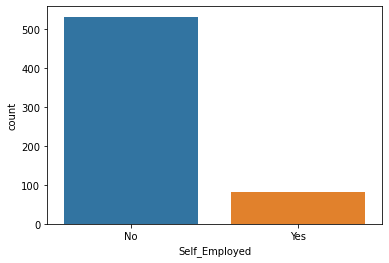

In [27]:
sns.countplot(df.Self_Employed)

There are very less application of Self employed people.

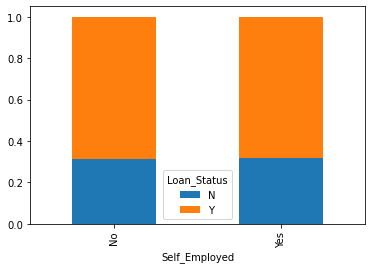

In [28]:
ct = pd.crosstab(df.Self_Employed, df.Loan_Status,normalize='index')
ct.plot.bar(stacked=True)
plt.show()

There is no impact on the loan status if you are self employed or not.

<AxesSubplot:xlabel='Married', ylabel='count'>

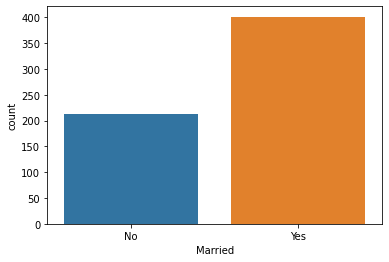

In [29]:
sns.countplot(df.Married)

Most of the applicants are Married.

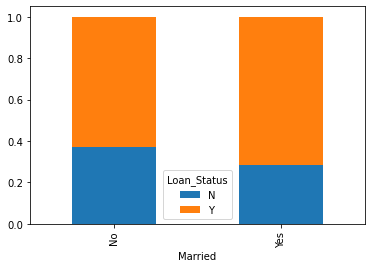

In [30]:
ct = pd.crosstab(df.Married, df.Loan_Status,normalize='index')
ct.plot.bar(stacked=True)
plt.show()

Being married increases your chances of loan approval.

<AxesSubplot:xlabel='Education', ylabel='count'>

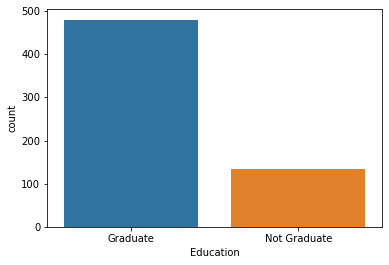

In [31]:
sns.countplot(df.Education)

Most of the applicants are Graduate.

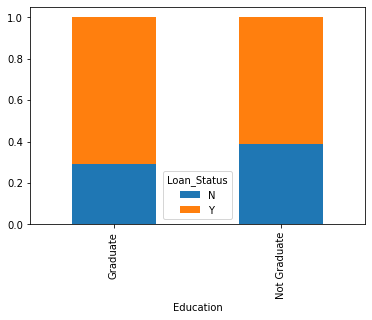

In [32]:
ct = pd.crosstab(df.Education, df.Loan_Status,normalize='index')
ct.plot.bar(stacked=True)
plt.show()

Being Graduate incrases the chances of loan approval.

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

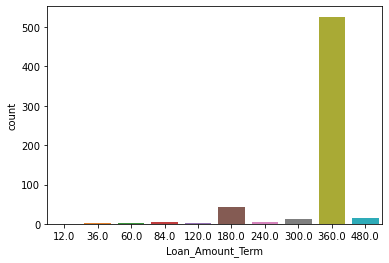

In [33]:
sns.countplot(df.Loan_Amount_Term)

Most of the applicant prefer to have 360 Term plan for loan.

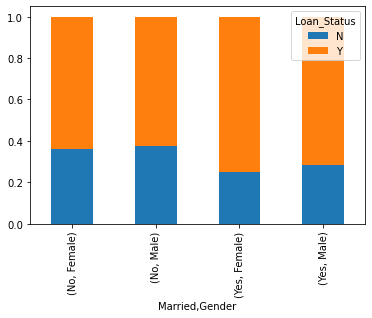

In [34]:
ct = pd.crosstab([df.Married, df.Gender],df.Loan_Status,normalize='index')
ct.plot.bar(stacked=True)
plt.show()

Married female has higher chance for loan approval.

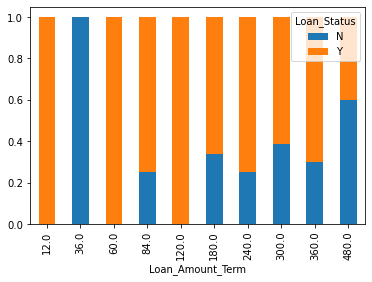

In [35]:
ct = pd.crosstab(df.Loan_Amount_Term,df.Loan_Status,normalize='index')
ct.plot.bar(stacked=True)
plt.show()

Having 12 and 120 Loan term has a great chance for Loan approval. 36 Loan terms willface mostly rejection.

In [36]:
df.Loan_ID.value_counts()

LP002938    1
LP001877    1
LP002768    1
LP002429    1
LP001097    1
           ..
LP002974    1
LP001095    1
LP002776    1
LP002622    1
LP001043    1
Name: Loan_ID, Length: 614, dtype: int64

Loan_ID is unique hence we will drop it as it will have no impact on the model fitting.

In [37]:
df.drop(['Loan_ID'],axis=1,inplace=True)

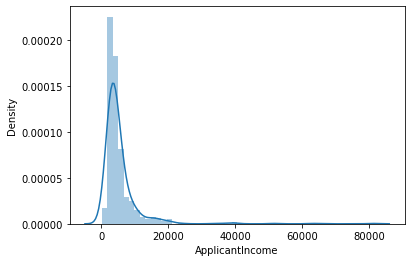

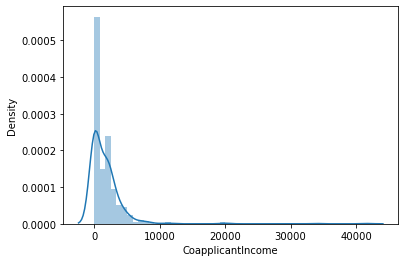

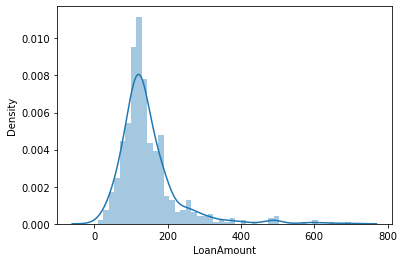

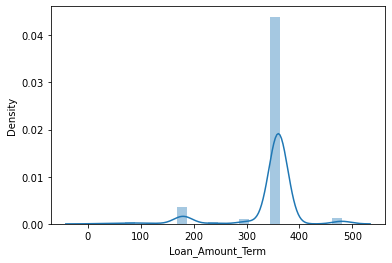

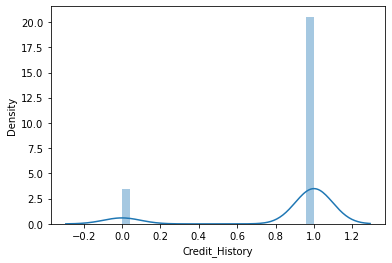

In [41]:
for i in df.columns:
    if df[i].dtypes!=object:
        sns.distplot(df[i])
        plt.show()

The data is not normally distributed and most of the data is skewed.

Lets check for skewness

In [43]:
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

We will use the Power ransform method to correct the skew.

In [44]:
from sklearn.preprocessing import power_transform

We will copy our DataFrame and drop all the object column.

In [45]:
df_new=df.copy()
df.drop(['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status','Dependents'],axis=1,inplace=True)

We will now the power transform function for the skew

In [46]:
df2=power_transform(df)
df2=pd.DataFrame(data=df2,columns=df.columns)

df2.skew()

ApplicantIncome     -0.092946
CoapplicantIncome   -0.145646
LoanAmount           0.020831
Loan_Amount_Term     0.392571
Credit_History      -2.021971
dtype: float64

Only Credit history show us the higher skew. Other methods were also not working hence we will now move forward.

Let's join the columns with the df2 DataFrame


In [47]:
df2['Gender']=df_new['Gender']
df2['Married']=df_new['Married']
df2['Education']=df_new['Education']
df2['Self_Employed'] = df_new['Self_Employed']
df2['Property_Area'] = df_new['Property_Area']
df2['Loan_Status']=df_new['Loan_Status']
df2['Dependents']=df_new['Dependents']

In [48]:
df2

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status,Dependents
0,0.544331,-1.102837,-0.025462,0.175540,0.411733,Male,No,Graduate,No,Urban,Y,0
1,0.170974,0.750578,-0.025462,0.175540,0.411733,Male,Yes,Graduate,No,Rural,N,1
2,-0.499955,-1.102837,-1.339826,0.175540,0.411733,Male,Yes,Graduate,Yes,Urban,Y,0
3,-0.743873,0.891686,-0.155876,0.175540,0.411733,Male,Yes,Not Graduate,No,Urban,Y,0
4,0.582817,-1.102837,0.170931,0.175540,0.411733,Male,No,Graduate,No,Urban,Y,0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,-0.554885,-1.102837,-1.197589,0.175540,0.411733,Female,No,Graduate,No,Rural,Y,0
610,-0.000290,-1.102837,-2.296436,-2.312879,0.411733,Male,Yes,Graduate,No,Rural,Y,3+
611,1.023487,0.208603,1.381387,0.175540,0.411733,Male,Yes,Graduate,No,Urban,Y,1
612,0.931750,-1.102837,0.750522,0.175540,0.411733,Male,Yes,Graduate,No,Urban,Y,2


Lets check now for outliers.

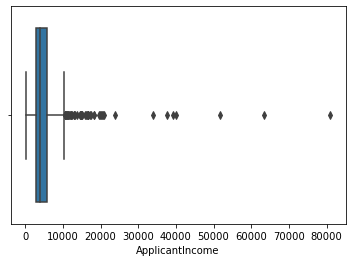

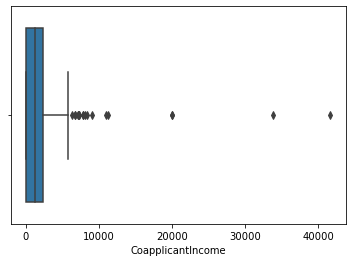

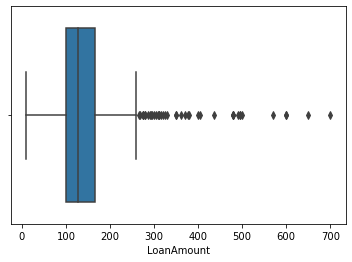

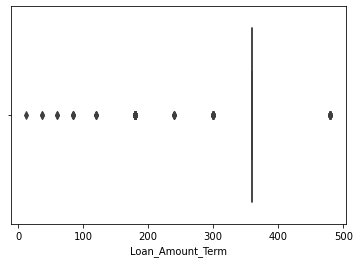

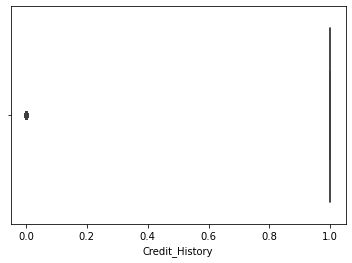

In [49]:
for i in df.columns:
    if df[i].dtypes!=object:
        sns.boxplot(df[i])
        plt.show()

There are outliers present in Credit history. However we will no remove them as we were losing huge data

We will now convert all the categorical column to numerical.

We will use Label Encoder to transform the data.

In [50]:
columns=['Gender','Married','Education','Self_Employed','Property_Area','Dependents','Loan_Status']

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in columns:
    df2[i]=le.fit_transform(df2[i])

In [51]:
df2

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status,Dependents
0,0.544331,-1.102837,-0.025462,0.175540,0.411733,1,0,0,0,2,1,0
1,0.170974,0.750578,-0.025462,0.175540,0.411733,1,1,0,0,0,0,1
2,-0.499955,-1.102837,-1.339826,0.175540,0.411733,1,1,0,1,2,1,0
3,-0.743873,0.891686,-0.155876,0.175540,0.411733,1,1,1,0,2,1,0
4,0.582817,-1.102837,0.170931,0.175540,0.411733,1,0,0,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,-0.554885,-1.102837,-1.197589,0.175540,0.411733,0,0,0,0,0,1,0
610,-0.000290,-1.102837,-2.296436,-2.312879,0.411733,1,1,0,0,0,1,3
611,1.023487,0.208603,1.381387,0.175540,0.411733,1,1,0,0,2,1,1
612,0.931750,-1.102837,0.750522,0.175540,0.411733,1,1,0,0,2,1,2


Lets check the corelation of each feature using corelation matrix

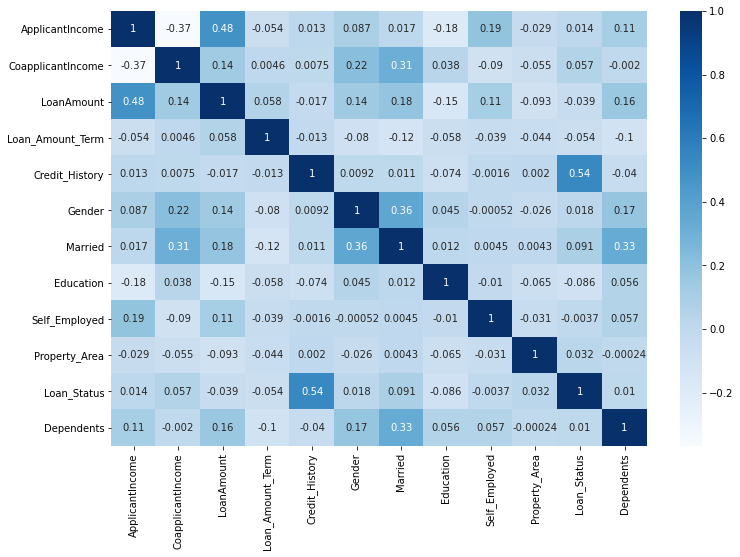

In [52]:
cor=df2.corr()
plt.figure(figsize=(12,8))
sns.heatmap(cor, annot=True, cmap='Blues')
plt.show()

1. Credit history has a very high corelation for loan being approved or rejected.
2. Loan Status has no corelation with being Self employed.
3. Loan amount is corelated with Applicant Income.

We are now going to split the data between input and target variable.

In [53]:
x=df2.drop(columns='Loan_Status')
y=df2['Loan_Status']

In [54]:
x

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Education,Self_Employed,Property_Area,Dependents
0,0.544331,-1.102837,-0.025462,0.175540,0.411733,1,0,0,0,2,0
1,0.170974,0.750578,-0.025462,0.175540,0.411733,1,1,0,0,0,1
2,-0.499955,-1.102837,-1.339826,0.175540,0.411733,1,1,0,1,2,0
3,-0.743873,0.891686,-0.155876,0.175540,0.411733,1,1,1,0,2,0
4,0.582817,-1.102837,0.170931,0.175540,0.411733,1,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
609,-0.554885,-1.102837,-1.197589,0.175540,0.411733,0,0,0,0,0,0
610,-0.000290,-1.102837,-2.296436,-2.312879,0.411733,1,1,0,0,0,3
611,1.023487,0.208603,1.381387,0.175540,0.411733,1,1,0,0,2,1
612,0.931750,-1.102837,0.750522,0.175540,0.411733,1,1,0,0,2,2


In [55]:
y=pd.DataFrame(data=y)
y

,Loan_Status
0,1
1,0
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1


We will bring our data to the standard scale using Standard Scaler

In [56]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_x=sc.fit_transform(x)

x=sc_x
x=pd.DataFrame(data=x)

In [57]:
x

,0,1,2,3,4,5,6,7,8,9,10
0,0.544331,-1.102837,-0.025462,0.175540,0.411733,0.472343,-1.372089,-0.528362,-0.392601,1.223298,-0.737806
1,0.170974,0.750578,-0.025462,0.175540,0.411733,0.472343,0.728816,-0.528362,-0.392601,-1.318513,0.253470
2,-0.499955,-1.102837,-1.339826,0.175540,0.411733,0.472343,0.728816,-0.528362,2.547117,1.223298,-0.737806
3,-0.743873,0.891686,-0.155876,0.175540,0.411733,0.472343,0.728816,1.892641,-0.392601,1.223298,-0.737806
4,0.582817,-1.102837,0.170931,0.175540,0.411733,0.472343,-1.372089,-0.528362,-0.392601,1.223298,-0.737806
...,...,...,...,...,...,...,...,...,...,...,...
609,-0.554885,-1.102837,-1.197589,0.175540,0.411733,-2.117107,-1.372089,-0.528362,-0.392601,-1.318513,-0.737806
610,-0.000290,-1.102837,-2.296436,-2.312879,0.411733,0.472343,0.728816,-0.528362,-0.392601,-1.318513,2.236021
611,1.023487,0.208603,1.381387,0.175540,0.411733,0.472343,0.728816,-0.528362,-0.392601,1.223298,0.253470
612,0.931750,-1.102837,0.750522,0.175540,0.411733,0.472343,0.728816,-0.528362,-0.392601,1.223298,1.244745


### Model Fitting and Selection

Importing all the libraries for model fitting, cross validation and ROC AUC curve

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

We will check the best possible random state to train our model. Using LogisticRegression to check and then later will run with other models

In [66]:

maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    mod=LogisticRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best Accuracy is',maxAccu,' on Random state',maxRS)

Best Accuracy is 0.8594594594594595  on Random state 8


#### We can see that the best random state is 8. We will split the data with this random state

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=8)

#### We will train and test the data using different classification Model

In [68]:
lg=LogisticRegression()
sv=SVC(probability=True)
knn=KNeighborsClassifier(n_neighbors=5)
rfc=RandomForestClassifier(n_estimators=100)
dt=DecisionTreeClassifier()
gnb=GaussianNB()
ad=AdaBoostClassifier(n_estimators=100)

In [69]:
lg=LogisticRegression()
sv=SVC(probability=True)
knn=KNeighborsClassifier(n_neighbors=5)
rfc=RandomForestClassifier(n_estimators=100)
dtc=DecisionTreeClassifier()
gnb=GaussianNB()
adc=AdaBoostClassifier(n_estimators=100)

model=[lg,sv,knn,rfc,dtc,gnb,adc]

Test=[]

for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('Accuracy score of',m)
    print(accuracy_score(y_test,pred))
    Test.append(acc)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print('-------------------------------------------------------------------------------------------')

Accuracy score of LogisticRegression()
0.8594594594594595
[[ 28  24]
 [  2 131]]
              precision    recall  f1-score   support

           0       0.93      0.54      0.68        52
           1       0.85      0.98      0.91       133

    accuracy                           0.86       185
   macro avg       0.89      0.76      0.80       185
weighted avg       0.87      0.86      0.85       185

-------------------------------------------------------------------------------------------
Accuracy score of SVC(probability=True)
0.8648648648648649
[[ 29  23]
 [  2 131]]
              precision    recall  f1-score   support

           0       0.94      0.56      0.70        52
           1       0.85      0.98      0.91       133

    accuracy                           0.86       185
   macro avg       0.89      0.77      0.81       185
weighted avg       0.87      0.86      0.85       185

-------------------------------------------------------------------------------------------

##### 1. Except DescionTreeClassifier most of the model has given us the accuracy above 80%
##### 2. SVC and GaussianNB has given us the best accuracy of 86% and 85% respectively

### Cross Validation

We will check the Underfitting or Overfitting of the model using Cross Validation

In [70]:
from sklearn.model_selection import cross_val_score

cv=[]
for m in model:
    score=cross_val_score(m,x,y,cv=5)
    cv.append(score.mean())
    print('Mean Accuracy of', m)
    print(score.mean())
    print('-------------------------------------------------------------------------------')

Mean Accuracy of LogisticRegression()
0.8078368652538984
-------------------------------------------------------------------------------
Mean Accuracy of SVC(probability=True)
0.8078235372517659
-------------------------------------------------------------------------------
Mean Accuracy of KNeighborsClassifier()
0.7719712115153938
-------------------------------------------------------------------------------
Mean Accuracy of RandomForestClassifier()
0.7866320138611222
-------------------------------------------------------------------------------
Mean Accuracy of DecisionTreeClassifier()
0.7296681327469012
-------------------------------------------------------------------------------
Mean Accuracy of GaussianNB()
0.8045848327335733
-------------------------------------------------------------------------------
Mean Accuracy of AdaBoostClassifier(n_estimators=100)
0.7752232440357191
-------------------------------------------------------------------------------


There is some underfitting in most of the model. However no much. We will see how our model will perform on ROC AUC score.

We will check the ROC_AUC score to pick the final model

### ROC_AUC score

AUC Score of LogisticRegression()
0.761711972238288




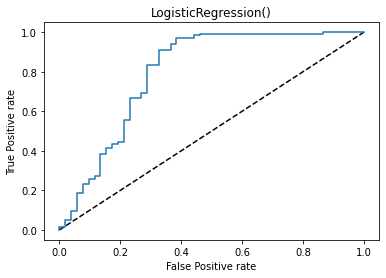



------------------------------------------------------------------------
AUC Score of SVC(probability=True)
0.7713273568536726




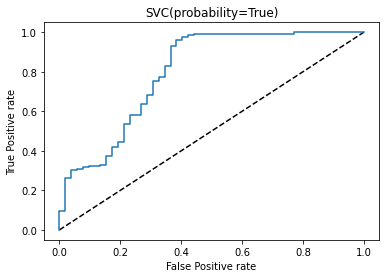



------------------------------------------------------------------------
AUC Score of KNeighborsClassifier()
0.7445777906304222




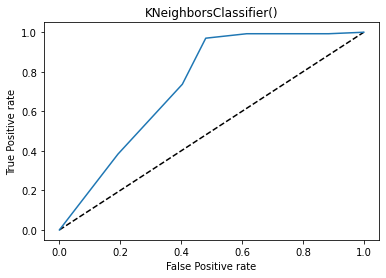



------------------------------------------------------------------------
AUC Score of RandomForestClassifier()
0.7717611336032388




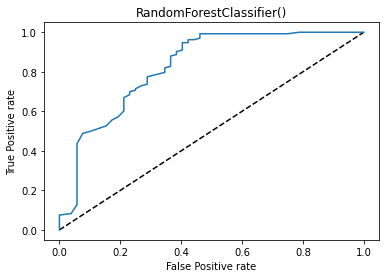



------------------------------------------------------------------------
AUC Score of DecisionTreeClassifier()
0.6681607865818392




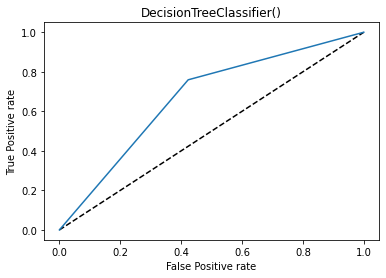



------------------------------------------------------------------------
AUC Score of GaussianNB()
0.7755205320994796




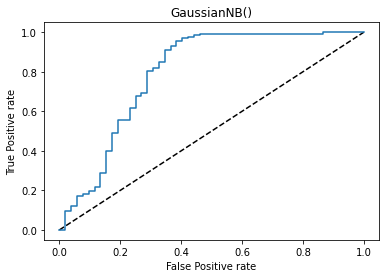



------------------------------------------------------------------------
AUC Score of AdaBoostClassifier(n_estimators=100)
0.7299739733950259




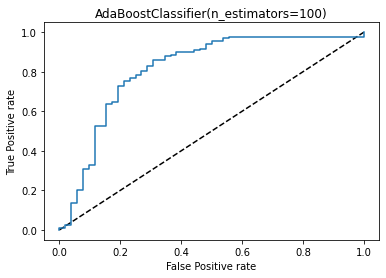



------------------------------------------------------------------------


In [71]:
from sklearn.metrics import roc_curve,roc_auc_score

auc=[]
for m in model:
    y_pred_prob=m.predict_proba(x_test)[:,1]
    fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
    auc_score=roc_auc_score(y_test,m.predict(x_test))
    auc.append(auc_score)
    print('AUC Score of', m)
    print(auc_score)
    print('\n')
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label=m)
    plt.xlabel('False Positive rate')
    plt.ylabel('True Positive rate')
    plt.title(m)
    plt.show()
    print('\n')
    print('------------------------------------------------------------------------')

We will now compare all our metrics score to determine the best fitting model

In [72]:
Performance={'Model':['LogisticRegression','SVC','KNeighborsClassifier','RandomForestClassifier','DecisionTreeClassifier','GaussianNB','AdaBoostClassifier'],
           'Test Score':Test,'Cross Validation Score':cv,'ROC AUC Score':auc}
Performance=pd.DataFrame(data=Performance)
Performance

,Model,Test Score,Cross Validation Score,ROC AUC Score
0,LogisticRegression,0.859459,0.807837,0.761712
1,SVC,0.864865,0.807824,0.771327
2,KNeighborsClassifier,0.843243,0.771971,0.744578
3,RandomForestClassifier,0.848649,0.786632,0.771761
4,DecisionTreeClassifier,0.708108,0.729668,0.668161
5,GaussianNB,0.854054,0.804585,0.775521
6,AdaBoostClassifier,0.805405,0.775223,0.729974


##### From the above metrics we can conclude that AdaBoostClassiifer is working best with accuracy of 80%, CV score of 77% and ROC_AUC of 72%

We can Hypertune our model to see if we can improve the accuracy.

### HyperTuning

In [73]:
from sklearn.model_selection import GridSearchCV

In [91]:
parameters = {'n_estimators': [50,100,200],
             'learning_rate':[0.001,0.01,0.1,0.2,0.5],'algorithm':['SAMME','SAMME.R']}

In [92]:
GCV1=GridSearchCV(AdaBoostClassifier(),parameters,cv=3)
GCV1.fit(x_train,y_train)
GCV1.best_params_

{'algorithm': 'SAMME', 'learning_rate': 0.2, 'n_estimators': 200}

AdaBoostClassifier
-----------------------------------------------
Accuracy Score 86.48648648648648
Cross Validation Score 80.9462881514061
AUC ROC Score 76.54713707345286


AUC ROC Curve with Final Mod


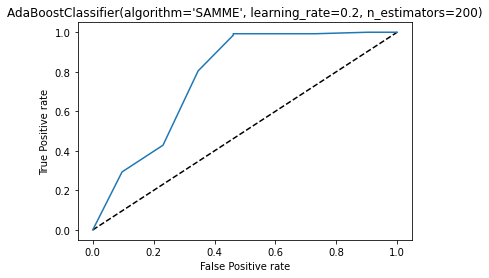

In [93]:
Finalmod1=AdaBoostClassifier(learning_rate= 0.2, n_estimators=200,algorithm='SAMME')
Finalmod1.fit(x_train,y_train)
pred1=Finalmod1.predict(x_test)
acc1=accuracy_score(y_test,pred1)

cvs1=cross_val_score(Finalmod1,x,y,cv=5)
y_pred_prob1=Finalmod1.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob1)
auc_score1=roc_auc_score(y_test,Finalmod1.predict(x_test))

print('AdaBoostClassifier')
print('-----------------------------------------------')
print('Accuracy Score',acc1*100)
print('Cross Validation Score',cvs1.mean()*100)
print('AUC ROC Score',auc_score1*100)
print('\n')
print('AUC ROC Curve with Final Mod')
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=AdaBoostClassifier)
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title(Finalmod1)
plt.show()

There has been a siginificant inrease in the model performance after Hypertuning

##### We are getting accuracy of 86%, Cross val score of 80 and AUC_ROC score of 76%

Lets create the obj file to save the model

In [95]:
import joblib
joblib.dump(Finalmod1,'Loan_Prediction.obj')

['Loan_Prediction.obj']

##### I did try to upscale using SMOTE but that was giving us less accuracy

#### Completed